# Introduction

In this personal project, I aim to explore trends and patterns in UFO sightings from NUFORC's UFO Sighthings Dataset which has reports until 2014. The goal is to identify insights from the data by answering the following questions:

1. Which countries report the most UFO Sightings?
2. How has number of sightings changed overtime?
3. What are the most commonly reported UFO shape?
4. What time of day and month have the highest probability of UFO sightings?


# Imports and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('ufo_sightings_scrubbed.csv',low_memory=False)

# Data Understanding

In [3]:
df.shape

(80332, 11)

From Data frame:
1. Datetime column has date and time combined together. I prefer it to be split for easier analysis
2. Country column is in alpha 2 notation and I prefer it to be having its full name
3. Contains columns such as duration (hours/min), comments, date posted, latitude and longtitude which I will drop as it is not important to my analysis or contains similar info to another column

In [4]:
df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


Checking the datatypes of each column, required columns like 'datetime' and 'duration (seconds)' uses a string is datatype so these have to be adjusted to the correct type.

In [5]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

After checking the null values, the country column has the most null values (which is the most important column for this analysis)

In [6]:
df.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

Inspecting the country column:
1. Country only contains 5 unique countries which highlights lack of other countries in the data
2. The countries are formatted by alpha-2 country code. I'll need to reformat them into their full names so it will be easier to understand

In [7]:
df['country'].value_counts()

country
us    65114
ca     3000
gb     1905
au      538
de      105
Name: count, dtype: int64

Investigating the country column with null values further, the rows:
1. Have a known state
2. Have a country in the city column

We can use this data to handle null values in the country column

In [8]:
df[df['country'].isna()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795
...,...,...,...,...,...,...,...,...,...,...,...
80238,9/9/2009 14:15,broomfield?lafayette,co,NaN,rectangle,120,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706
80244,9/9/2009 20:17,lyman,me,NaN,light,600,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968
80319,9/9/2013 20:15,clifton,nj,NaN,other,3600,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755
80322,9/9/2013 21:00,aleksandrow (poland),NaN,NaN,light,15,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814


From viewing the dataframe and its details, we'll need to clean the data by:
1. Dropping irrelevant columns
2. Dropping duplicated data
3. Reformatting country column
4. Handling nulls in country column
5. Converting columns into the right datatype
6. Split datetime column into date and time respectively
7. Removing Outliers (if any)

# Data Cleaning

#### Dropping columns

In [9]:
df.drop(columns = ['duration (hours/min)','comments', 'date posted', 'latitude','longitude '], inplace = True)

#### Dropping Duplicates

In [10]:
df.drop_duplicates(inplace = True)
df.shape

(79916, 6)

#### Reformatting country column

Since there is only 5 unique countries so far, I'll format them manually

In [11]:
df.loc[df['country'] == 'us', 'country'] = 'united states'
df.loc[df['country'] == 'ca', 'country'] = 'canada'
df.loc[df['country'] == 'gb', 'country'] = 'united kingdom'
df.loc[df['country'] == 'au', 'country'] = 'australia'
df.loc[df['country'] == 'de', 'country'] = 'germany'

#### Handling null values in country column

Filling the 'country' column based on 'state' column 
**NOTE**: I'm using only US and Canada states as the data source is North America centric

In [12]:
#List of all US states
us_states = {'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi',
             'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi',
             'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc',
             'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut',
             'vt', 'va', 'wa', 'wv', 'wi', 'wy'}

#List of all canadian states
canada_states = ["ab", "bc", "mb", "nb", "nl", "ns", "on", "pe", "qc", "sk", "nt", "nu", "yt"]

#Filling the null value in 'country' column if it is null and the 'state' is in US or Canada respectively
df.loc[df['country'].isna() & df['state'].isin(us_states), 'country'] = 'united states'
df.loc[df['country'].isna() & df['state'].isin(canada_states), 'country'] = 'canada'

Filling the 'country' column based on country names inputted into the 'city' column

In [13]:
#List of all countries in the world
countries = [
    "afghanistan", "albania", "algeria", "andorra", "angola", "antigua and barbuda", "argentina",
    "armenia", "australia", "austria", "azerbaijan", "bahamas", "bahrain", "bangladesh", "barbados",
    "belarus", "belgium", "belize", "benin", "bhutan", "bolivia", "bosnia and herzegovina", "botswana",
    "brazil", "brunei", "bulgaria", "burkina faso", "burundi", "cabo verde", "cambodia", "cameroon",
    "canada", "central african republic", "chad", "chile", "china", "colombia", "comoros",
    "congo (congo-brazzaville)", "costa rica", "croatia", "cuba", "cyprus", "czech republic",
    "democratic republic of the congo", "denmark", "djibouti", "dominica", "dominican republic",
    "ecuador", "egypt", "el salvador", "equatorial guinea", "eritrea", "estonia", "eswatini",
    "ethiopia", "fiji", "finland", "france", "gabon", "gambia", "georgia", "germany", "ghana",
    "greece", "grenada", "guatemala", "guinea", "guinea-bissau", "guyana", "haiti", "honduras", "hong kong",
    "hungary", "iceland", "india", "indonesia", "iran", "iraq", "ireland", "israel", "italy",
    "ivory coast", "jamaica", "japan", "jordan", "kazakhstan", "kenya", "kiribati", "kuwait",
    "kyrgyzstan", "laos", "latvia", "lebanon", "lesotho", "liberia", "libya", "liechtenstein",
    "lithuania", "luxembourg", "madagascar", "malawi", "malaysia", "maldives", "mali", "malta",
    "marshall islands", "mauritania", "mauritius", "mexico", "micronesia", "moldova", "monaco",
    "mongolia", "montenegro", "morocco", "mozambique", "myanmar", "namibia", "nauru",
    "nepal", "netherlands", "new zealand", "nicaragua", "niger", "nigeria", "north korea",
    "north macedonia", "norway", "oman", "pakistan", "palau", "palestine", "panama", "papua new guinea",
    "paraguay", "peru", "philippines", "poland", "portugal", "qatar", "romania", "russia", "rwanda",
    "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "samoa", "san marino",
    "sao tome and principe", "saudi arabia", "senegal", "serbia", "seychelles", "sierra leone",
    "singapore", "slovakia", "slovenia", "solomon islands", "somalia", "south africa", "south korea",
    "south sudan", "spain", "sri lanka", "sudan", "suriname", "sweden", "switzerland", "syria",
    "taiwan", "tajikistan", "tanzania", "thailand", "timor-leste", "togo", "tonga", "trinidad and tobago",
    "tunisia", "turkey", "turkmenistan", "tuvalu", "uganda", "ukraine", "uae",
    "united kingdom", "united states", "uruguay", "uzbekistan", "vanuatu", "vatican city",
    "venezuela", "viet nam", "yemen", "zambia", "zimbabwe"
]

#Method to return country name if it in the passed string parameter (city in this case)
def extract_country(city):
    for country in countries:
        if country in city or country == city:
            return country
    return np.nan

#Applying method to each row where 'country' column is null
df.loc[df['country'].isna(), 'country'] = df[df['country'].isna()]['city'].apply(extract_country)

Checking the 'country' columns again that are null, most of the 'city' column contains 'uk/england'. I'll change these rows into united kingdom to make it more understandable

In [14]:
df[df['country'].isna()]

,datetime,city,state,country,shape,duration (seconds)
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20
125,10/10/2003 23:00,bickerton (near wetherby) (uk/england),NaN,NaN,unknown,2700
1036,10/12/2000 20:08,brixham&#44 devon (uk/england),NaN,NaN,light,600
1290,10/13/2003 12:30,guasave sinaloa,NaN,NaN,changing,480
1554,10/14/2002 20:00,newcastle-upon-tyne (uk/england),NaN,NaN,oval,4200
...,...,...,...,...,...,...
79592,9/6/2007 19:15,lowestoft (uk/england),NaN,NaN,light,120
79885,9/8/1996 00:00,seattle to tokyo (2 nwa flt 007),NaN,NaN,sphere,10800
79911,9/8/2001 21:30,st. annes (uk/england),NaN,NaN,unknown,30
79924,9/8/2002 20:00,washington&#44 d.c. (georgetown),dc,NaN,rectangle,1800


In [15]:
#Labeling rows in 'city' column which contains uk/england as 'united kingdom' in 'country column'
df['country'] = df.apply(
    lambda row: 'united kingdom' if pd.isna(row['country']) and "uk/england" in row['city'].lower() else row['country'],
    axis=1
)

Checking the nulls in the 'country' column again, the 'city' data are too varied or either a sighting outside the country. Since the number of rows in the this null 'country' column values is significantly less than the actual dataframe, it'll take too much effort too clean out a small portion of the data, so I will just drop these values

In [16]:
df[df['country'].isna()]

,datetime,city,state,country,shape,duration (seconds)
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20
1290,10/13/2003 12:30,guasave sinaloa,NaN,NaN,changing,480
1740,10/15/1968 21:30,pacific ocean (1500mi.sw of u.s.mainland),NaN,NaN,circle,30
1890,10/15/1992 22:30,nhlangano (swaziland),NaN,NaN,sphere,600
1918,10/15/1995 22:00,washington&#44 d.c.,dc,NaN,light,600
...,...,...,...,...,...,...
78390,9/29/2000 16:35,washington&#44 d.c.,dc,NaN,circle,900
78422,9/29/2004 02:30,washington&#44 d.c.,dc,NaN,circle,600
78585,9/30/1974 17:00,puerto rico,NaN,NaN,sphere,60
79885,9/8/1996 00:00,seattle to tokyo (2 nwa flt 007),NaN,NaN,sphere,10800


In [17]:
#Dropping remaining empty
df.dropna(subset="country", inplace = True)

Checking the 'country' column now, there are much more countries than before which shows that we're able to fill in some of the missing data

In [18]:
df['country'].value_counts()

country
united states                       70445
canada                               3589
united kingdom                       2295
australia                             632
mexico                                222
                                    ...  
georgia                                 1
guinea                                  1
democratic republic of the congo        1
moldova                                 1
qatar                                   1
Name: count, Length: 132, dtype: int64

#### Changing columns into correct datatype

First is the 'duration (seconds)' column as it should be as float type

In [19]:
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors = 'coerce')

Next is the 'datetime' column. However, some of the data in the 'datetime' column have their time written as 24:00 which returns an error if converted into a datetime object, so I changed it to 00:00 (since it's equivalant) before converting it.

In [20]:
#Chnage time from 24:00 to 00:00
df['datetime'] = df['datetime'].replace({'24:00': '00:00'}, regex = True)

#Change formatting from string to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format = "%m/%d/%Y %H:%M")

#### Splitting 'datetime' column into 'date' and 'time' columns

In [21]:
#Creates new 'date' column which has only the date portion of the datetime
df['date'] = pd.to_datetime(df['datetime'].dt.date, format = "%m/%d/%Y")

#Creates new 'time' column which has only time portion of the datetime
df['time'] = df['datetime'] - df['date']

The 'datetime' column will be dropped as it will no longer be used

In [22]:
df.drop(columns = ['datetime'], inplace = True)

### Removing Outliers

From the 'duration (seconds)' column, the highest duration is 9.783600e+07 seconds or 27176 hours which is quite extreme. Upon plotting all the points in a box and whiskers plot (see below), there are points which are very far from the box (represented as a tiny line in the plot). This highlights that there are outliers in the dataset

In [23]:
df.describe()

,duration (seconds),date,time
count,7.943800e+04,79441,79441
mean,8.301321e+03,2004-05-19 22:03:29.997356672,0 days 15:49:04.932717362
min,1.000000e-03,1906-11-11 00:00:00,0 days 00:00:00
25%,3.000000e+01,2001-08-03 00:00:00,0 days 10:30:00
50%,1.800000e+02,2006-11-24 00:00:00,0 days 19:35:00
75%,6.000000e+02,2011-06-24 00:00:00,0 days 21:45:00
max,9.783600e+07,2014-05-08 00:00:00,0 days 23:59:00
std,5.941373e+05,NaN,0 days 07:46:28.931341636


<Axes: ylabel='duration (seconds)'>

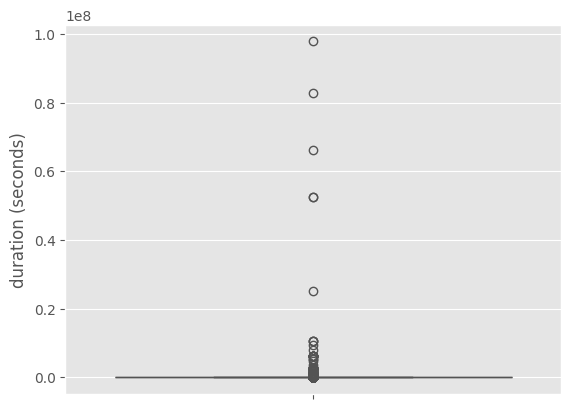

In [24]:
sns.boxplot(df['duration (seconds)'])

To remove the outliers, I've chosen the IQR approach as most of the data are concentrated at much smaller values of under an hour which are more realistic. After eliminating the outliers, the higher duration is 1440 seconds, or 24 minutes which is more realistic.

In [25]:
q1 = df['duration (seconds)'].quantile(0.25)
q3 = df['duration (seconds)'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df = df[(df['duration (seconds)'] >= lower_bound) & (df['duration (seconds)'] <= upper_bound)].reset_index(drop = True)

df.describe()

,duration (seconds),date,time
count,69071.000000,69071,69071
mean,263.168641,2004-07-07 16:08:43.704593920,0 days 15:58:04.673451955
min,0.001000,1910-01-01 00:00:00,0 days 00:00:00
25%,20.000000,2001-08-17 00:00:00,0 days 11:00:00
50%,120.000000,2006-12-18 00:00:00,0 days 19:43:00
75%,300.000000,2011-07-04 00:00:00,0 days 21:45:00
max,1440.000000,2014-05-08 00:00:00,0 days 23:59:00
std,325.515414,NaN,0 days 07:39:53.213825342


To double check the values, I used a histogram to find the distribution which is heavily skewed towards smaller values. I find this accetable the average ufo sighting should last around a few minutes

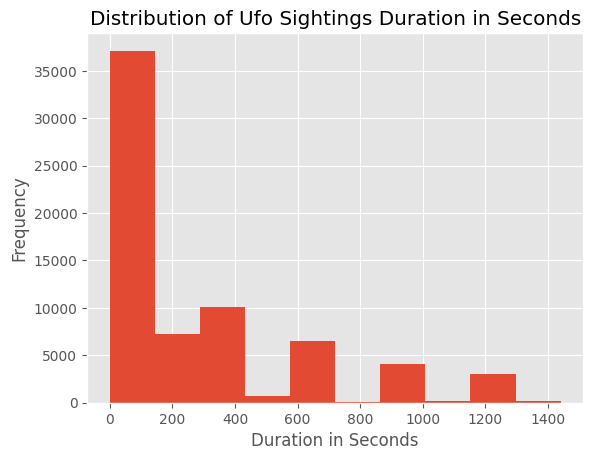

In [26]:
plt.hist(df['duration (seconds)'])

plt.title('Distribution of Ufo Sightings Duration in Seconds')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')

plt.show()

Now that the data is cleaned, I can prepare on answering my original questions

# Answering Questions

## Which countries report the most UFO Sightings?

To visualize the total number of UFO sightings per country, I decided to use a cloropleth map as it shows all the countries. A logarithmic scale will be used as there is a huge disparity of sightings frequency between some countries.

In [27]:
#Gets the total number of sightings per country
country_sightings = df['country'].value_counts().to_frame().reset_index()

#Plots the data with a cloropleth map
fig = go.Figure(data=go.Choropleth(
    locations = country_sightings['country'],
    z=np.log10(country_sightings['count']),
    locationmode = 'country names',
    colorscale='Reds',
    marker_line_color='black',
    customdata=country_sightings['count'],  # Pass original values for hover
    hovertemplate='<b>%{location}</b><br> Sightings: %{customdata:,}<extra></extra>',
    colorbar=dict(len=1,
                  title='#Sightings',
                  x = 1.02,
                  tickvals = [0, 1, 2, 3, 3.699, 4.7],
                  ticktext = ['1', '10', '100', '1000', '5000','60000'])
))

#Set title
fig.update_layout(
    title_text = 'Total UFO Sightings by Country'
)

fig.show()

**From the cloropleth map:**
* The top 5 countries with greatest sightings are:
* 1. United States – 61,668 sightings
  2. Canada – 3,147 sightings
  3. United Kingdom – 2,067 sightings
  4. Australia – 567 sightings
  5. India – 178 sightings
* The number of sightings in the United States far exceeds that of all other countries.
* The continents North America, Europe and Australia show significant activity of UFO sightings while Africa shows little
* Most countries report less than 100 sightings

**Possible Explanation**
* The culture of UFO Sightings more popular in western countries, especially the United States
* Since the data is from NUFORC, a United States based organization, data is skewed towards United States and western countries

## How has number of UFO sightings changed overtime?

To answer this question, I decided to approach it in 2 different ways:
* Global Trend: The number of sightings reported globally per year
* Country-Level Trend: The number of sightings in each individual country per year

**Note:** The years 1940 and below were filtered out as there was not much sightings before then

### Global Trend

I used a line graph as it provides a simple visualization of how the number of sightings has changed.

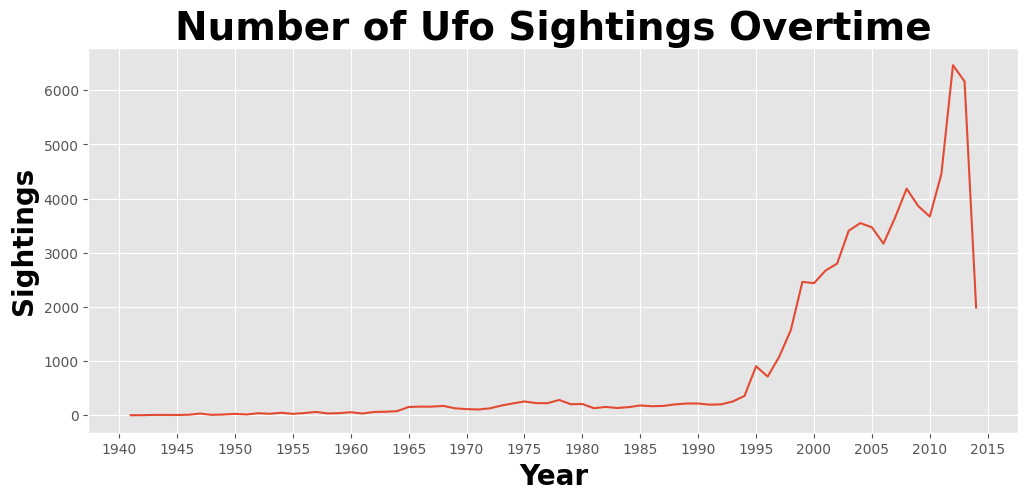

In [28]:
#Creates a table of years and the corresponding number of sightings
year_counts = df['date'].dt.year.value_counts().reset_index()

year_counts.rename(columns = {'date': 'year'}, inplace = True) #Renaming columns
year_counts.sort_values('year', inplace = True) #Sorting year column in descending order
year_counts = year_counts[year_counts['year'] > 1940].copy() #Filters the years to 1940 or above

plt.figure(figsize = (12,5))

#Plots line graph
plt.plot(year_counts['year'], year_counts['count'])

plt.xticks(np.arange(1940, 2016,5))
plt.title('Number of Ufo Sightings Overtime', fontsize = 28, fontweight = 'bold') #Create title
plt.xlabel('Year', color = 'black', fontsize = 20, fontweight = 'bold') #Create x axis name
plt.ylabel('Sightings', color = 'black', fontsize = 20, fontweight = 'bold') #Create y axis name

plt.show()

**From the Line graph:**:
* 1940-1990: General steady increase of UFO Sightings but still remained relatively low.
* 1990-2012: Sharp increase of UFO sightings peaking at 6000+ sightings
* 2012-2014: Noticable decrease of UFO sighthings

### Country Level Trend

I used a series of cloropleth maps to show how UFO sightings changed per country. I do this by first creating dataframe indexed by years and making the columns the different number of countries. Each row is provides the number UFO sightings in each country.

In [29]:
#Creates table of years in ascending order
annual_country_sightings = df['date'].dt.year.drop_duplicates().reset_index(drop = True).to_frame()
annual_country_sightings.rename(columns = {'date': 'year'}, inplace = True) #Rename column
annual_country_sightings.sort_values('year', inplace = True) #Sorts in ascending order

# Loops through each country to make a new column for it that includes the number of sightings per year
for country in df['country'].drop_duplicates():
    temp = df[['date','country']].copy() #Create temporary dataframe which takes only date and country of original dataframe
    temp['year'] = temp['date'].dt.year #Extract the year portion of date
    temp.drop(columns = ['date'], inplace = True) #Drops the date column

    #Counts the number of sightings that country reported made pear year
    temp = temp[temp['country'] == country].groupby('year', as_index = False).count()

    #Adds the country and its reported sightings to the dataframe of years
    annual_country_sightings = annual_country_sightings.merge(temp, how = 'left', on = 'year')
    annual_country_sightings.rename(columns = {'country': country}, inplace = True) #Renames column 

#Fills the null values with zero
annual_country_sightings.fillna(0, inplace = True)

After creating the table, I reformat it that is suitable for making the series of cloropleth maps before plotting them.

In [30]:
#Melts the original table to make it suitable for making the cloropleth maps
annual_country_sightings = annual_country_sightings[annual_country_sightings['year'] >= 1941].copy()
annual_country_sightings = annual_country_sightings.melt(id_vars = 'year', value_vars = annual_country_sightings.columns, var_name='country', value_name = 'count')

#Plots the series of cloropleth maps

data_slider = []
for year in annual_country_sightings['year'].unique():
    segment =  annual_country_sightings[annual_country_sightings['year']== year]

    data_each_yr = dict(
                        type='choropleth',
                        locations = segment['country'],
                        z=np.log10(segment['count']),
                        zmin = 0,
                        zmax = 3.9,
                        customdata = segment['count'],  # Pass original values for hover
                        hovertemplate='<b>%{location}</b><br> Sightings: %{customdata:,}<extra></extra>',
                        locationmode = 'country names',
                        colorscale='Reds',
                        colorbar= dict(
                                       title = '# Sightings',
                                       tickvals = [0, 1, 2, 3, 3.78],
                                       ticktext = ['1', '10', '100', '1000', '6000']
                                      )
    )

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1941))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='UFO Sightings by Country Since 1941',
              sliders=sliders)

fig = go.Figure(data=data_slider, layout=layout)
fig.show()


c:\Users\leona\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



**Observations**
* United States and a few other countries were the only ones which reported sightings since 1941
* After 1985, there was a huge growth countries started to report UFO sightings
* Only United States, Canada, United Kingdom, Australia and India showed a consistent increase of reported UFO sightings. The other countries dont seem to follow a consistent trend

## Most commonly reported UFO shape

To identify the most commonly reported UFO shapes, I used a bar plot sorted in descending order to visualize the distribution of reported shapes. I excluded shapes with fewer than 10 reports to exclude rare or misreported entries.

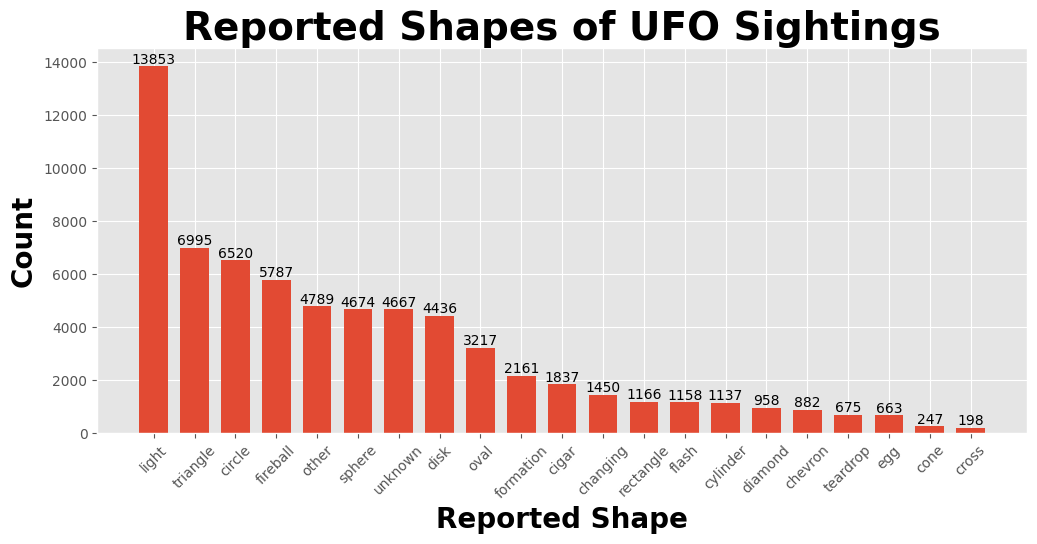

In [31]:
#Creates a dataframe of shapes and their corresponding number of sighthings
shape_count = df['shape'].value_counts().to_frame().reset_index()

shape_count = shape_count[shape_count['count'] >10].copy() #Filters out sighthings under 100

plt.figure(figsize = (12, 5))

fig = plt.bar(shape_count['shape'], shape_count['count'], width = 0.7)

plt.xticks(rotation = 45)

plt.title('Reported Shapes of UFO Sightings', fontsize = 28, fontweight = 'bold')
plt.xlabel('Reported Shape', color = 'black', fontsize = 20, fontweight = 'bold')
plt.ylabel('Count', color = 'black', fontsize = 20, fontweight = 'bold')

plt.bar_label(fig)

plt.show()

**Observations**
* Most dominant shape is light, ammounting for around 20.5% (See code below) of the total reported shapes. This implies that most UFO sightings involve bright objects rather than distinct shapes
* Next common shapes are 'triangle' and 'circle' which have similar number of reports which are very recognisable shapes.
* 'Other' and 'Unknown' appear quite high on the bar plot (Top 5 and 7 respectively), underlining that people sometimes arent able to identify what shapes the UFO --> Potentially due to poor visibility
* The shapes with lowest sightings (chevron, teardrop, egg, etc) are obscure which may make them harder to identify

In [32]:
#Calculating number of reporting 'light' as proportion of total sighthings
13853/shape_count['count'].sum()

np.float64(0.20532088335556545)

## What time of day and month have the highest probability of UFO sightings?

To answer this question, I'll first plot bar plots of Time of Day and box plot Month of Ufo Sightings before using a heatmap as it'll help me make predictions and ensure that the data is reliable. For the Time of Day, I'll use hours of the day 

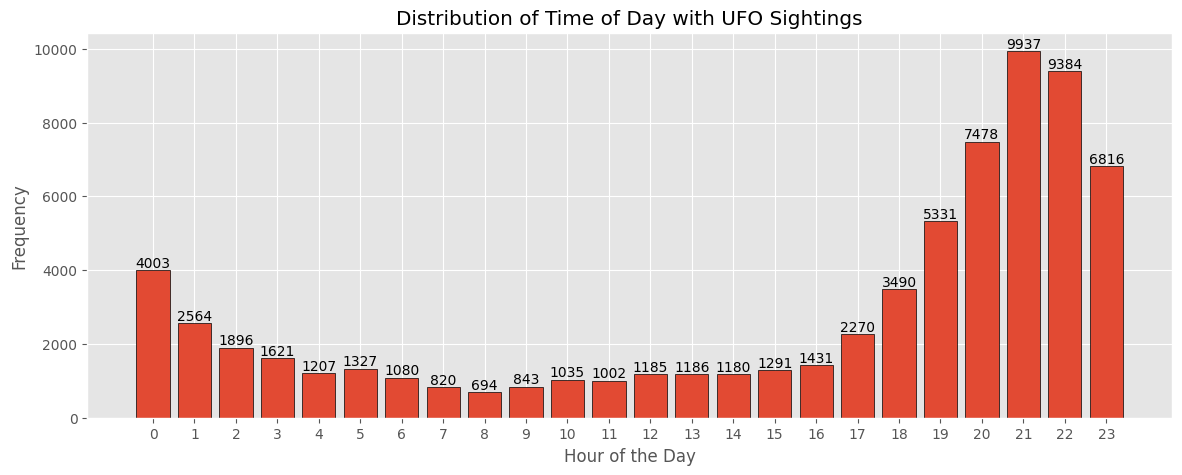

In [33]:
#Creates a table of hours of the day and the corresponding number of sightings
hours_count = df['time'].dt.components['hours'].value_counts().to_frame().reset_index()

#Plot bar plot
plt.figure(figsize = (14,5))
fig = plt.bar(hours_count['hours'], hours_count['count'], edgecolor = 'black')

plt.xticks(np.arange(0,24,1))

plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Time of Day with UFO Sightings')

plt.bar_label(fig)

plt.show()

**Observation:**
* Majority of the observations take place at night from 19:00 - 23:59, accounting for approximately 56% of the sighthings. This trend likely reflects the lack of sunlight, making UFO's more visible in the sky. This relates with how the majority how 'light' was the most reported ufo shape.
* Although the hours 00:00 - 03:59 also lack sunlight, sighthing frequency is low likely because less people are awake during this time.

In [34]:
hours_count[(hours_count['hours'] >= 19) & (hours_count['hours'] <=23)]['count'].sum()/hours_count['count'].sum()

np.float64(0.5638545844131401)

### Distribution of UFO of Time of Day with UFO Sightings

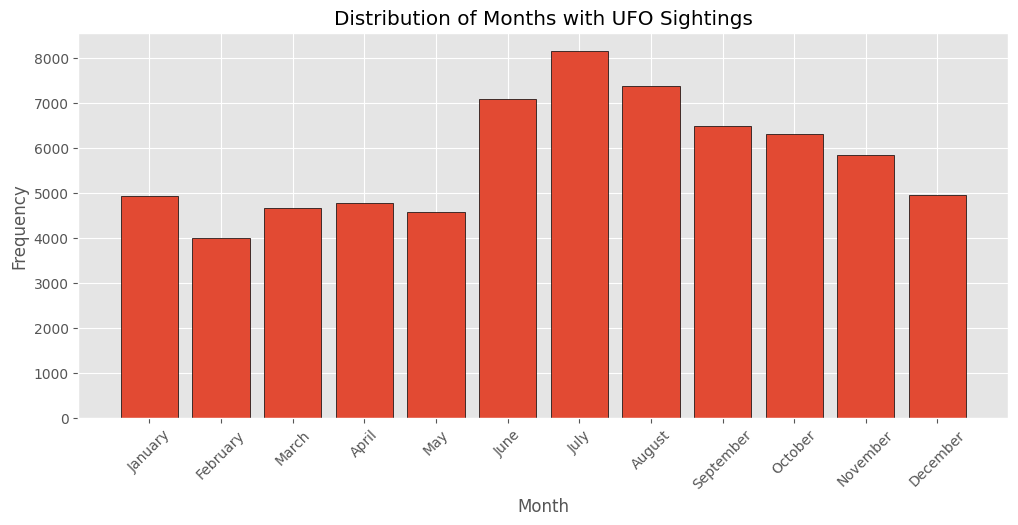

In [35]:
#Creates a table of month and the corresponding number of sightings
month_count = df['date'].dt.month.value_counts().reset_index()
month_count.rename(columns = {'date': 'month'}, inplace = True) #Rename columns
month_count.sort_values('month', inplace = True) #Sorts month number

plt.figure(figsize = (12,5))
plt.bar(month_count['month'], month_count['count'], edgecolor = 'black')

plt.xticks(ticks = np.arange(1,13,1),
           labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
           rotation = 45
          )

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Months with UFO Sightings')

plt.show()

**Observation**
* July and the months adjacent to it has the higher frequency of sighthings
* The second half of the year has more UFO sighthings than the first half

### Heatmap of Hour of Day and Month

[]

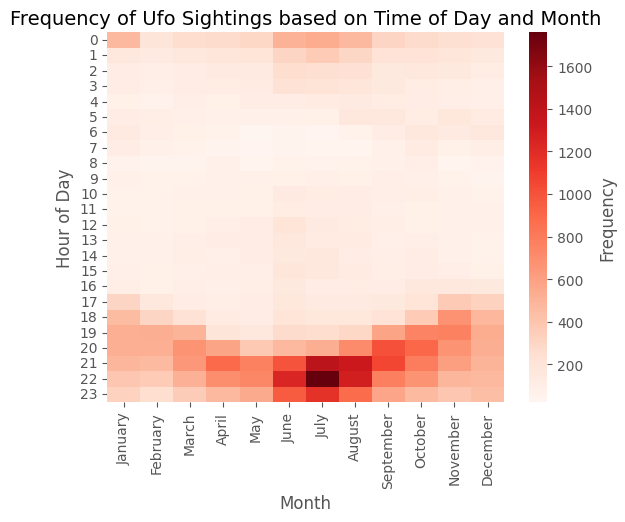

In [36]:
#Creates dataframe containing months and hour of the day and their corresponding frequency of sighthings
time_month_count = pd.DataFrame()
time_month_count['hour'] = df['time'].dt.components['hours']  #Gets Hours of the day
time_month_count['month'] = df['date'].dt.month #Gets month

#Create pivot table which counts number of sighthing that matches hour and month
time_month_count = time_month_count.pivot_table(index='hour', columns='month', aggfunc='size')

#Plot Heatmap
sns.heatmap(time_month_count,
            cmap = 'Reds',
            xticklabels = ["January", "February", "March", "April", "May", "June",
                           "July", "August", "September", "October", "November", "December"
                          ],
            cbar_kws={'label': 'Frequency'}
           )

plt.title('Frequency of Ufo Sightings based on Time of Day and Month', fontsize = 14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)

plt.plot()

**Observations:**
* The month and hour pairing which yields the highest sighting frequency is July and hour 22, surroundingwhich means that the best chance to spot an UFO during the year is at July between 22:00-22:59 which fits my prediction.
* The second half of the year have more activity/Ufo Sighthings compared to the first (from the darker hues)
* The boxes surronding the July and hour 22 pairing have the darkest spots in the heatmap, meaning that between June-August during 21:00 - 23:59
* The best time to spot an UFO every month lies between 19:00 - 23:59, which fits the trend of the box plot earlier

# Summary

In summary, to answer my original questions for this project:
* **Which countries report the most UFO Sightings?**
  * In first place, United States by a significant amount, followed by Canada, Australia, United Kingdom then India 
* **How has number of sightings changed overtime?**
  * Remained relatively low from 1940 until 1990 where it sharply increased. However, from 2012-2014 UFO sighthings began to decrease by a significant amount
  * Only United States, Canada, United Kingdom, Australia and India showed a consistent increase of reported UFO sightings
* **What are the most commonly reported UFO shape?**
  * 'light' was the most reported which accounted for 20.5% of total shapes, indicating that most people saw bright objects
  * 'triangle' and 'circle' (top 2 and 3 respectively and half the reports of 'light' each) were distinct shapes with the most reports
  * 'other' and 'unknown' were also reported many times, highlighting that most people couldn't identify the UFO shapes
* **What time of day and month have the highest probability of UFO sightings?**
  * July between 22:00-22:59
  * Generally, theres a higher chance of finding UFO's during:
    * the times between 19:00 - 23:59 which accounted for more than half (56%) of sighthings the whole day
    * the second half of the year compared to the first half

However, it is important to note that most of the reports came from the United States, which could be because the data source NUFORC is a company based there.

### BONUS: UFO Sightings by State in the USA

Since I had enough data, I wanted to plot how UFO sighthings vary by US states for fun :D

In [37]:
us_sightings = df[df['country'] == 'united states']['state'].reset_index(drop = True).value_counts().reset_index()

us_sightings['state'] = us_sightings['state'].str.upper()

fig = go.Figure(data=go.Choropleth(
    locations = us_sightings['state'],
    z = us_sightings['count'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'algae',
    colorbar_title = "Sightings",
))

fig.update_layout(
    title_text = 'UFO Sightings by state in USA',
    geo_scope='usa', # limit map scope to USA
)

fig.show()